In [1]:
# Load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Just to filter out warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set path to dataset
file_path = "../data/data_banknote_authentication.txt"
data = pd.read_csv(file_path, sep=",", header = None)

In [4]:
# Set new column names
col_names = ["Variance_of_Wavelet_Transformed_Image",
            "Skewness_of_Wavelet_Transformed_Image",
             "Curtosis_of_Wavelet_Transformed_Image",
             "Entropy_of_Image",
             "Class"
            ]

In [5]:
# Rename columns and show first 5 rows
data.columns = col_names
data.head()

,Variance_of_Wavelet_Transformed_Image,Skewness_of_Wavelet_Transformed_Image,Curtosis_of_Wavelet_Transformed_Image,Entropy_of_Image,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Size of the dataset
data.shape

(1372, 5)

In [7]:
# Check whether the is any missing entry
data.isnull().sum()

Variance_of_Wavelet_Transformed_Image    0
Skewness_of_Wavelet_Transformed_Image    0
Curtosis_of_Wavelet_Transformed_Image    0
Entropy_of_Image                         0
Class                                    0
dtype: int64

In [8]:
# Check data type of features and target
data.dtypes

Variance_of_Wavelet_Transformed_Image    float64
Skewness_of_Wavelet_Transformed_Image    float64
Curtosis_of_Wavelet_Transformed_Image    float64
Entropy_of_Image                         float64
Class                                      int64
dtype: object

In [9]:
# See the frequency of the outcomes
data["Class"].value_counts()

0    762
1    610
Name: Class, dtype: int64

In our analysis, we make the following convention
 * 1 stands for a **genuine** banknote.
 * 0 stands for a **forged** banknote.

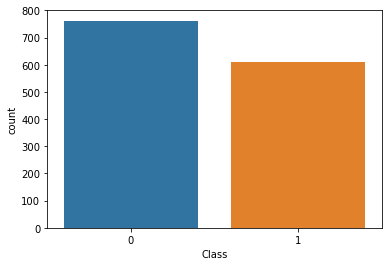

In [10]:
sns.countplot(data['Class'])

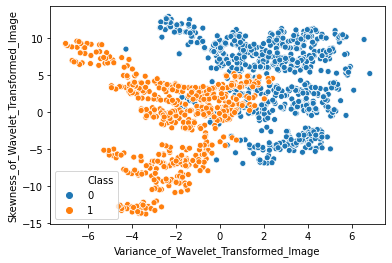

In [11]:
sns.scatterplot(x = 'Variance_of_Wavelet_Transformed_Image', 
                y = 'Skewness_of_Wavelet_Transformed_Image', 
                hue = 'Class', data = data)

In [12]:
# Check the minimum value of the features
data.iloc[:, :-1].min().value_counts()

-8.5482     1
-7.0421     1
-13.7731    1
-5.2861     1
dtype: int64

In [13]:
# Check the maximum value of the features
data.iloc[:, :-1].max().value_counts()

2.4495     1
12.9516    1
17.9274    1
6.8248     1
dtype: int64

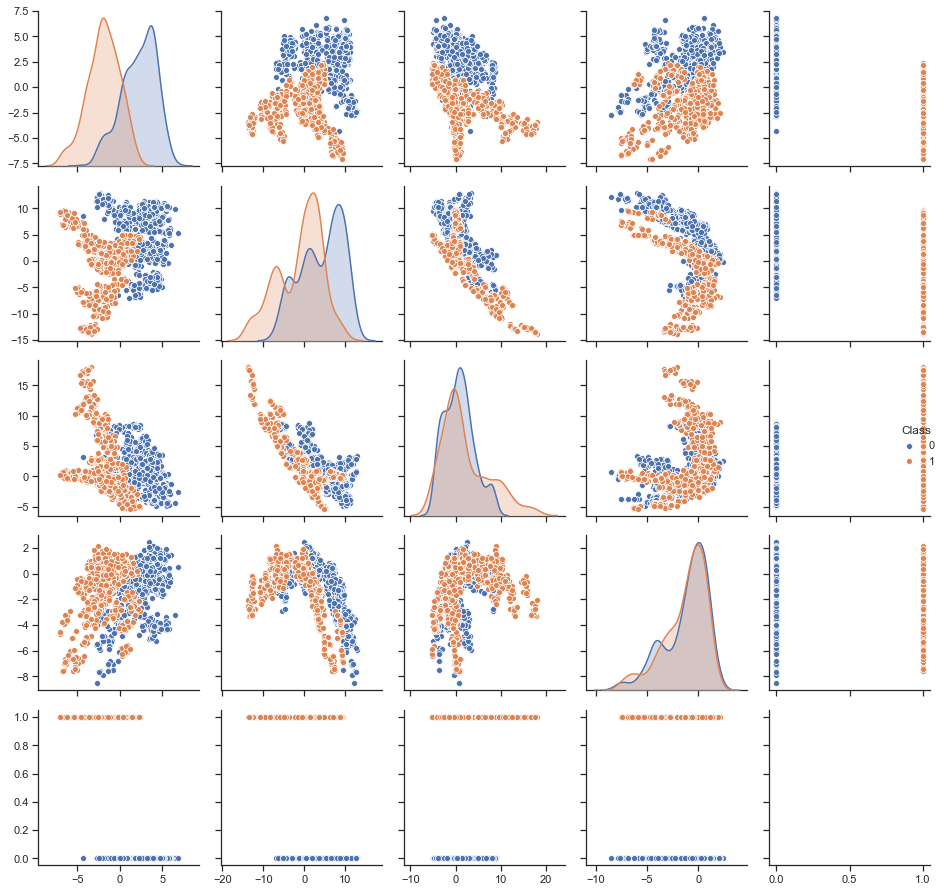

In [14]:
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(data, hue = "Class", vars=col_names)
ax.set(xlabel="", ylabel="")
ax.fig.tight_layout()

[Text(0, 0.5, 'Variance_of_Wavelet_Transformed_Image'),
 Text(0, 1.5, 'Skewness_of_Wavelet_Transformed_Image'),
 Text(0, 2.5, 'Curtosis_of_Wavelet_Transformed_Image'),
 Text(0, 3.5, 'Entropy_of_Image'),
 Text(0, 4.5, 'Class')]

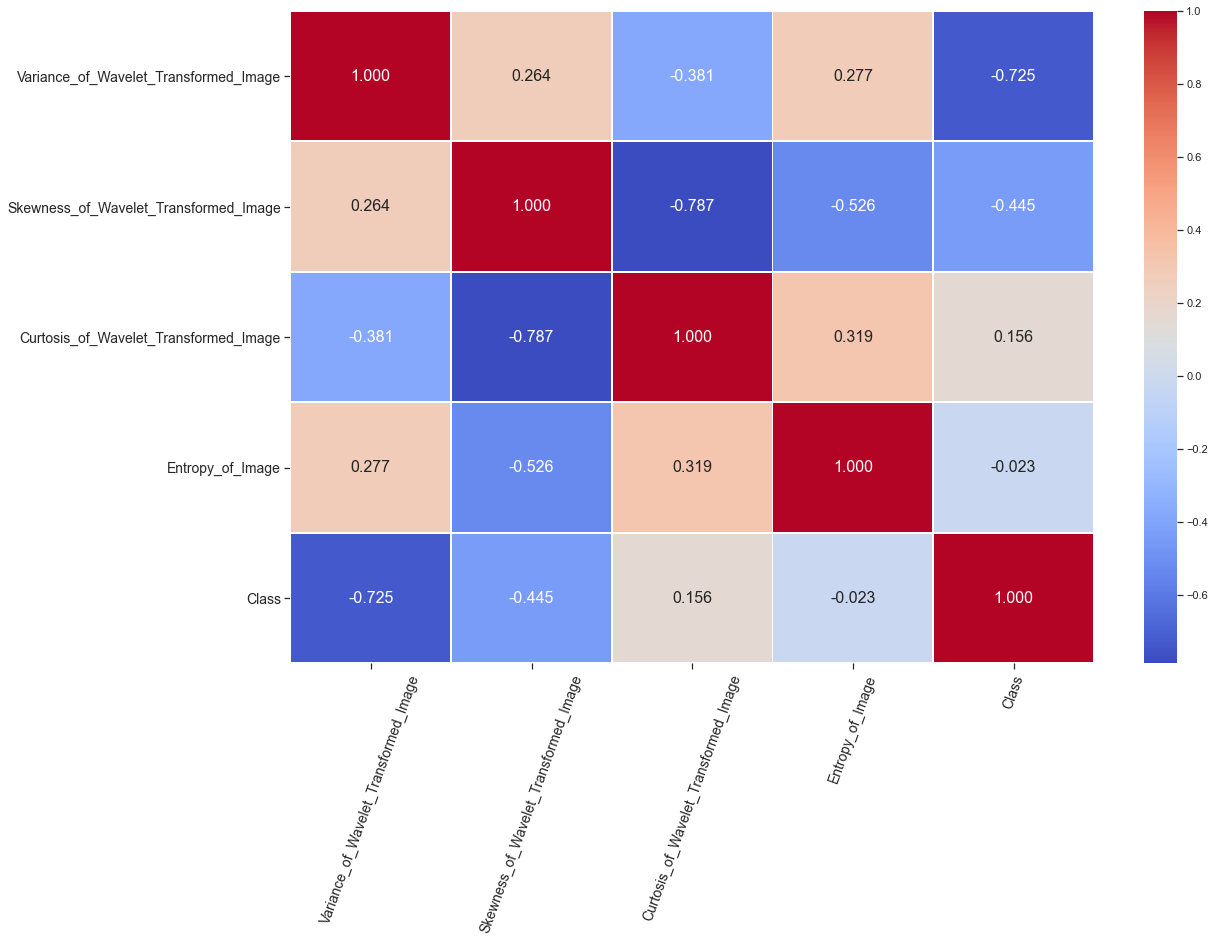

In [15]:
# Use the heatmap to better visualize the correlations
plt.figure(figsize = (18,12))
ax = sns.heatmap(data.corr(), annot= True, cmap = 'coolwarm', fmt = '.3f', linewidths = .8, annot_kws={'size':16})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 14)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 14)

In [16]:
# Prepare for train_test split

# Set the feature matrix
X = data.iloc[:, :-1]

# Set the target vector
y = data.iloc[:, -1]

### Logistic Regression

Many of the lines of code reproduced herein are adapted from [https://machinelearningmastery.com/](machinelearningmastery.com).

In [17]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import train_test_split helping with the model
from sklearn.model_selection import train_test_split

# Import scaler to standardize the training set
from sklearn.preprocessing import StandardScaler

# Import metrics for accuracy results 
from sklearn import metrics

We employ Logistic Regression to analyze the data without and with scaling. Then, we compare the accuracies that we obtain.

#### Data without Scaling

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(1097, 4) (1097,)


In general, models employed in ML problemas are sensitive to outliers. Let's then remove outliers, so that we can improve algorithm performance. To do that, we use `IsolationForest()`.

In [19]:
# Import isolation forest to detect anomaly
from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

yhat

array([-1,  1, -1, ..., -1,  1,  1])

The outliers are the entries that correspond to -1. For the details go to [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

In [20]:
# Select all rows that are not outliers
mask = yhat!= -1

X_train = X_train.loc[mask, :]
y_train = y_train[mask]

# Summarize the shape of the training dataset after removing the outliers
print(X_train.shape, y_train.shape)

(987, 4) (987,)


In [21]:
# Fit the model
# Standard logistic regression
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
# Load methods for l1 & l2 penalized logistic regression
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
log_reg_l1 = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularized logistic regression
log_reg_l2 = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [23]:
# Load methods for accuracy
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In [24]:
# Check classes
log_reg.classes_

array([0, 1])

In [25]:
# Check the probabilities to one entry to belong to a certain class
log_reg.predict_proba(X)

array([[9.99999751e-01, 2.49242751e-07],
       [9.99999983e-01, 1.73956298e-08],
       [9.99642414e-01, 3.57586294e-04],
       ...,
       [5.90328942e-01, 4.09671058e-01],
       [1.58215975e-01, 8.41784025e-01],
       [2.06315169e-03, 9.97936848e-01]])

In [26]:
log_reg.predict(X)

array([0, 0, 0, ..., 0, 1, 1])

In [27]:
# How good is the model?
log_reg.score(X, y)

0.9905247813411079

In [28]:
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       762
           1       0.99      0.99      0.99       610

    accuracy                           0.99      1372
   macro avg       0.99      0.99      0.99      1372
weighted avg       0.99      0.99      0.99      1372



Since we have to compare the results obtained for each method, we will use a more clever argument. 

In [29]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['log_reg', 'l1', 'l2']
coeff_models = [log_reg, log_reg_l1, log_reg_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [30]:
y_pred.head()

,log_reg,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [31]:
y_pred[y_pred.l1 != y_pred.l2]

,log_reg,l1,l2


In [32]:
y_prob.head()

,log_reg,l1,l2
0,0.999983,1.000000,1.000000
1,0.933396,0.994449,0.969550
2,0.982437,0.999720,0.995307
3,1.000000,1.000000,1.000000
4,0.999994,1.000000,1.000000


In [33]:
# Get metrics for each method

# Initialize list and dictionary
metrics = list()
conf_mat = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores
    auc = roc_auc_score(y_test, y_pred[lab], average='weighted')
    
    # Last, the confusion matrix
    conf_mat[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 
                              'recall':recall, 
                              'fscore':fscore, 
                              'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)


In [34]:
# Compare Results
metrics

,log_reg,l1,l2
precision,0.985455,0.985455,0.985455
recall,0.985455,0.985455,0.985455
fscore,0.985455,0.985455,0.985455
accuracy,0.985455,0.985455,0.985455
auc,0.985369,0.985369,0.985369


#### Data with Scaling

In [35]:
# Standardize the feature matrix
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)
X_ss

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [36]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 42)

In [37]:
# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(1097, 4) (1097,)


In [38]:
# Identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [39]:
# Select all rows that are not outliers
mask = yhat!= -1
X_train = X_train[mask, :]
y_train = y_train[mask]

In [40]:
X_train.shape, y_train.shape

((987, 4), (987,))

In [41]:
# Fit the model
# Standard logistic regression
log_reg_ss = LogisticRegression(solver="liblinear")
log_reg_ss.fit(X_train, y_train)

# L1 regularized logistic regression
log_reg_ss_l1 = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularized logistic regression
log_reg_ss_l2 = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [42]:
# Predict the class and the probability for each
y_pred_ss = list()
y_prob_ss = list()

coeff_labels_ss = ['log_reg_ss', 'ss_l1', 'ss_l2']
coeff_models_ss = [log_reg_ss, log_reg_ss_l1, log_reg_ss_l2]

for lab, mod in zip(coeff_labels_ss, coeff_models_ss):
    y_pred_ss.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob_ss.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred_ss = pd.concat(y_pred_ss, axis=1)
y_prob_ss = pd.concat(y_prob_ss, axis=1)

In [43]:
# Get metrics for each method

# Initialize list and dictionary
metrics_ss = list()
conf_mat_ss = dict()

for lab in coeff_labels_ss:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred_ss[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_ss[lab])
    
    # ROC-AUC scores
    auc = roc_auc_score(y_test, y_pred_ss[lab], average='weighted')
    
    # Last, the confusion matrix
    conf_mat_ss[lab] = confusion_matrix(y_test, y_pred_ss[lab])
    
    metrics_ss.append(pd.Series({'precision':precision, 
                              'recall':recall, 
                              'fscore':fscore, 
                              'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics_ss = pd.concat(metrics_ss, axis=1)

In [44]:
# Compare results
metrics_ss

,log_reg_ss,ss_l1,ss_l2
precision,0.978308,0.985455,0.981854
recall,0.978182,0.985455,0.981818
fscore,0.978193,0.985455,0.981823
accuracy,0.978182,0.985455,0.981818
auc,0.978612,0.985369,0.981991


Observe that the difference between scaled and not scaled dataset is not so significant. 

### KNN

Next, we employ the K-Nearest Neighbor algorithm to study our classification problem.

In [45]:
# Load the Max Abs Scaler method
from sklearn.preprocessing import MaxAbsScaler

# Initialize scaler
max_abs_scaler = MaxAbsScaler()

In [46]:
# Apply the transformation to the feature matrix
X = max_abs_scaler.fit_transform(X)

In [47]:
# Check transformations
print("The maximum value in X is {}\n and the minimum value is {}".format(X.max(), X.min()))

The maximum value in X is 1.0
 and the minimum value is -1.0


Now that the data are scaled, let us split the sample into training and test samples, with the test sample representing 20% of observations. Then, we apply the `LocalOutlierFactor()` to remove the outliers.

In [48]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(1097, 4) (1097,)


In [49]:
# Load local outlier factor to remove outliers
from sklearn.neighbors import LocalOutlierFactor

# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [50]:
# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(1092, 4) (1092,)


Next, we estimate a K-Nearest Neighbors model using K=3. Then, we examine the Precision, Recall, F-1 Score, and Accuracy of the classification. Finally, we use a graphic to illustrate the Confusion Matrix.

In [51]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Import f1_score
from sklearn.metrics import f1_score

In [52]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)

#Train the model using the training sets
knn = knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Report outcomes; precision, recall, and f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Accuracy score:  1.0
F1 Score:  1.0


The results show that our KNN algorithm is able to classify all the 275 records in the test set with 100% accuracy, which is excellent.

Text(0.5, 48.5, 'Ground Truth')

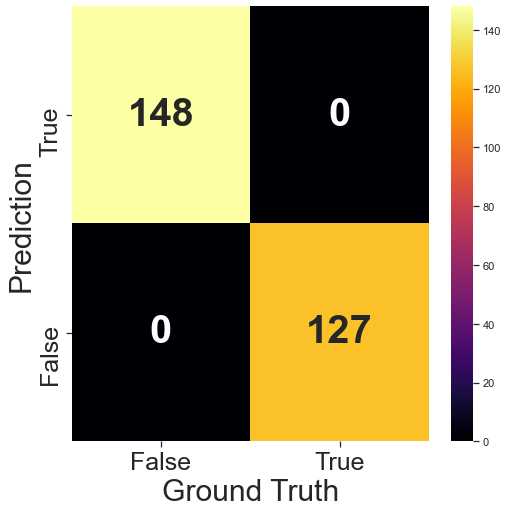

In [53]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="inferno", annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

Now, let us consider K=5, and use the same split of training and test set.

In [54]:
# Fit the model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Accuracy score:  1.0
F1 Score:  1.0


Text(0.5, 48.5, 'Ground Truth')

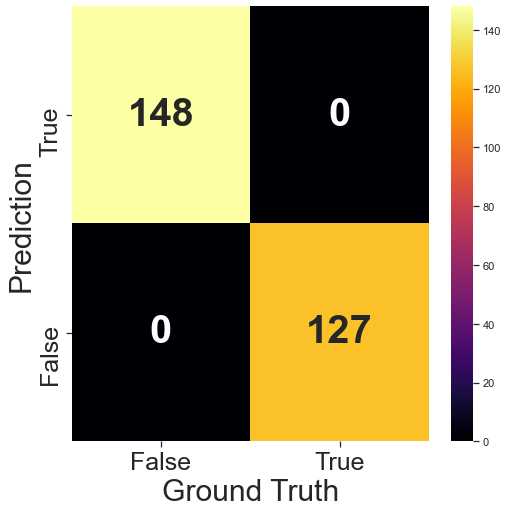

In [55]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="inferno", annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

Now, let's determine the best value for K.

In [56]:
k_range = range(1, 40)
scores = {}
scores_list = list()

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

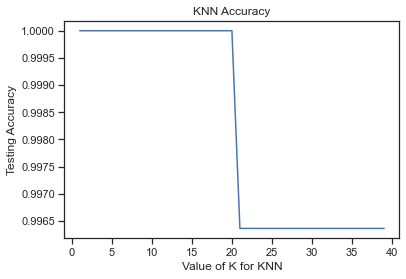

In [57]:
%matplotlib inline
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("KNN Accuracy")
plt.savefig('knn_acc.png')

So, we can choose any integer number between 2 and 19.

#### K-fold cross-validation

Recall that K-Cross-validation (This K is different from k of the kNN classifier) is a statistical technique which involves partitioning the data into 'K' subsets of equal size. The model is trained on the data of (K-1) subsets and the remaining one subset is used as the test dataset to validate the model. We perform multiple rounds of the above procedure until all K subsets are used for validation once. Then we combine the validation results from these multiple rounds to come up with an estimate of the model performance.

In [58]:
# Import cross_val_score function from the model_selection sub-module of scikit learn
from sklearn.model_selection import cross_val_score

# Save the accuracy scores for a 10 fold cross validation in Accuracy_scores
accuracy_scores = cross_val_score(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy')

# Print all 10 accuracy scores
print(accuracy_scores)

[1.         1.         1.         1.         0.99270073 0.99270073
 1.         1.         1.         1.        ]


In [59]:
k_fold_acc = accuracy_scores.mean()
k_fold_acc

0.9985401459854014

#### Hyperparameter tuning using GridsearchCV

In [60]:
# Import GridSearchCV algorithm from the model_selection sub-module of scikit learn
from sklearn.model_selection import GridSearchCV

# Define an object containing hyperparameter name and potential values as key-value pairs
hyperparameter_values = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 
                         'leaf_size':[20, 25, 30, 35, 40, 45]}

In [61]:
# Instantiate the GridSearchCV algorithm
grid_scv = GridSearchCV(KNeighborsClassifier(), hyperparameter_values, cv = 10)

# Fit the data
grid_scv.results = grid_scv.fit(X, y)

In [62]:
# Get the accuracy results
grid_scv_acc = grid_scv.results.best_score_ 
print('Best estimator/model: ', grid_scv.results.best_estimator_)
print('Best parameter combination: ', grid_scv.results.best_params_)
print('Best accuracy score: ', grid_scv_acc)

Best estimator/model:  KNeighborsClassifier(leaf_size=20, n_neighbors=1)
Best parameter combination:  {'leaf_size': 20, 'n_neighbors': 1}
Best accuracy score:  0.9985401459854014


In [63]:
# Hierarchical indices and columns
col_names = ["GridSearchCV", "K-FoldCrossValidation"]
columns = pd.MultiIndex.from_product([['Accuracy'], col_names])

# Entries of the DataFrame
num = [(grid_scv_acc, k_fold_acc)]

# Create the DataFrame
knn_results = pd.DataFrame(num, index=['K-NN'], columns=columns)
knn_results

Accuracy                      
     GridSearchCV K-FoldCrossValidation
K-NN      0.99854               0.99854

### SVM

We use the One-Class SVM to capture the density of the majority class and classify examples on the extremes of the density function as outliers. 

In [64]:
# Import OneClassSVM method to remove outliers
from sklearn.svm import OneClassSVM

# Import Support Vector Classifier
from sklearn.svm import SVC

# Import K-fold and cross-val-score
from sklearn.model_selection import KFold, cross_val_score

# Import Normalizer Scaler
from sklearn.preprocessing import Normalizer

In [65]:
# Normalize the feature matrix
norm = Normalizer()
X = norm.fit_transform(X)

In [66]:
# Check transformations
print("The maximum value in X is {}\n and the minimum value is {}".format(X.max(), X.min()))

The maximum value in X is 0.9978735893897638
 and the minimum value is -0.9966545340753921


In [67]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# Identify outliers in the training dataset
one_cls_out = OneClassSVM(nu=0.01)
yhat = one_cls_out.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(1097, 4) (1097,)
(1069, 4) (1069,)


In [68]:
# Train a SVM classifier to perfom a train-test-split with 10 fold-cross validation
scoring = 'accuracy'
svc = SVC()
kfold = KFold(n_splits = 10, random_state = 42)

cv_results = cross_val_score(svc, X_train, y_train, cv = kfold, scoring = scoring)
accuracy_train = cv_results.mean()
print("Accuracy on train set: ", accuracy_train)

Accuracy on train set:  0.9990654205607477


In [69]:
# Predict on the test data and find the accuracy of the model
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
accuracy_svm

0.9963636363636363

Let us recall that support vector machines algorithms have two options for Linear Model: `LinearSVC()` and `SVC(kernel='linear')`. The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. So, now we compare their accuracies.

In [70]:
# Import LinearSVC from svm
from sklearn.svm import LinearSVC

In [71]:
# Change the kernel in SVC and evaluate its accuracy
kernels = ["linear", "poly", "rbf", "sigmoid"]

for k in kernels:
    svc = SVC(kernel = k)
    svc.fit(X_train, y_train)
    predictions = svc.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Accuracy of SVC with {} kernel: {}".format(k, acc))

Accuracy of SVC with linear kernel: 0.9963636363636363
Accuracy of SVC with poly kernel: 0.9963636363636363
Accuracy of SVC with rbf kernel: 0.9963636363636363
Accuracy of SVC with sigmoid kernel: 0.9054545454545454


In [72]:
# Function borrowed from skit-learn user guide

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

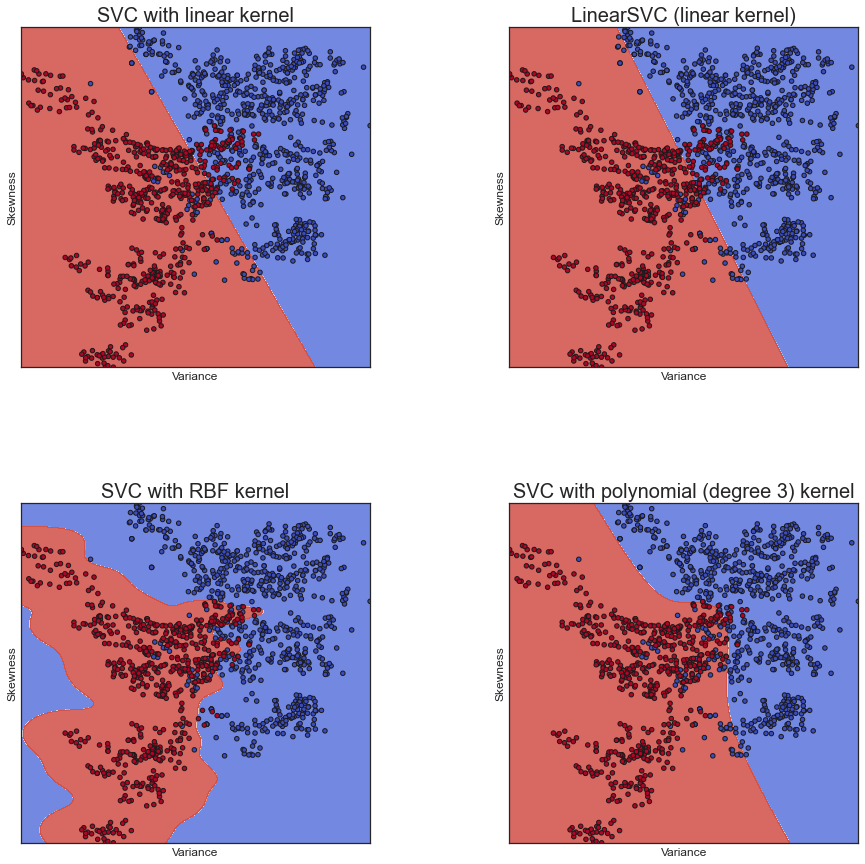

In [74]:
# Create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

# Make a copy of dataset
data_c = data.values.copy()

# Take the first two features and the target
X = data_c[:, :2]
y = data_c[:, -1]

 # SVM regularization parameter
C = 1.0 

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C, max_iter=10000),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Variance')
    ax.set_ylabel('Skewness')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, size = 20)

plt.savefig("svc-linearSVC.png")    
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Borrowed a function from 
# https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
        
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

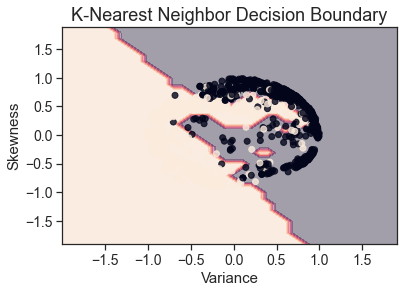

In [76]:
plt.figure()
plt.title("K-Nearest Neighbor Decision Boundary", fontsize = 18)
plt.xlabel("Variance",fontsize=15)
plt.ylabel("Skewness",fontsize=15)
plot_decision_boundaries(X_train, y_train, KNeighborsClassifier)
plt.show();

### Decision Tree

In [77]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Set feature matrix and the target
X = data_c[:, :-1]
y = data_c[:, -1]

In [79]:
# Standardize the feature matrix
X = scaler.fit_transform(X)

In [80]:
# Check transformations
print("The maximum value in X is {}\n and the minimum value is {}".format(X.max(), X.min()))

The maximum value in X is 3.836585778226311
 and the minimum value is -3.50270342036576


In [81]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# Identify outliers in the training dataset
one_cls_out = OneClassSVM(nu=0.01)
yhat = one_cls_out.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(1097, 4) (1097,)
(1083, 4) (1083,)


In [82]:
# Fit a decision tree classifier with no set limits on maximum depth, features, or leaves
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
# Get the number of nodes and the maximum actual depth
print("The number of nodes is {}\n and the maximal depth is {}.".format(tree_clf.tree_.node_count, tree_clf.tree_.max_depth))

The number of nodes is 45
 and the maximal depth is 7.


In [84]:
# Import metrics scores for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to get results
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [85]:
# The error on the training and test data sets
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)


# Apply the function defined to get the results
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

# Print results in a DataFrame
train_test_full_error

,train,test
accuracy,1.0,0.992727
precision,1.0,0.983193
recall,1.0,1.000000
f1,1.0,0.991525


In [86]:
# Import necessary libraries for visualizing the decision tree
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

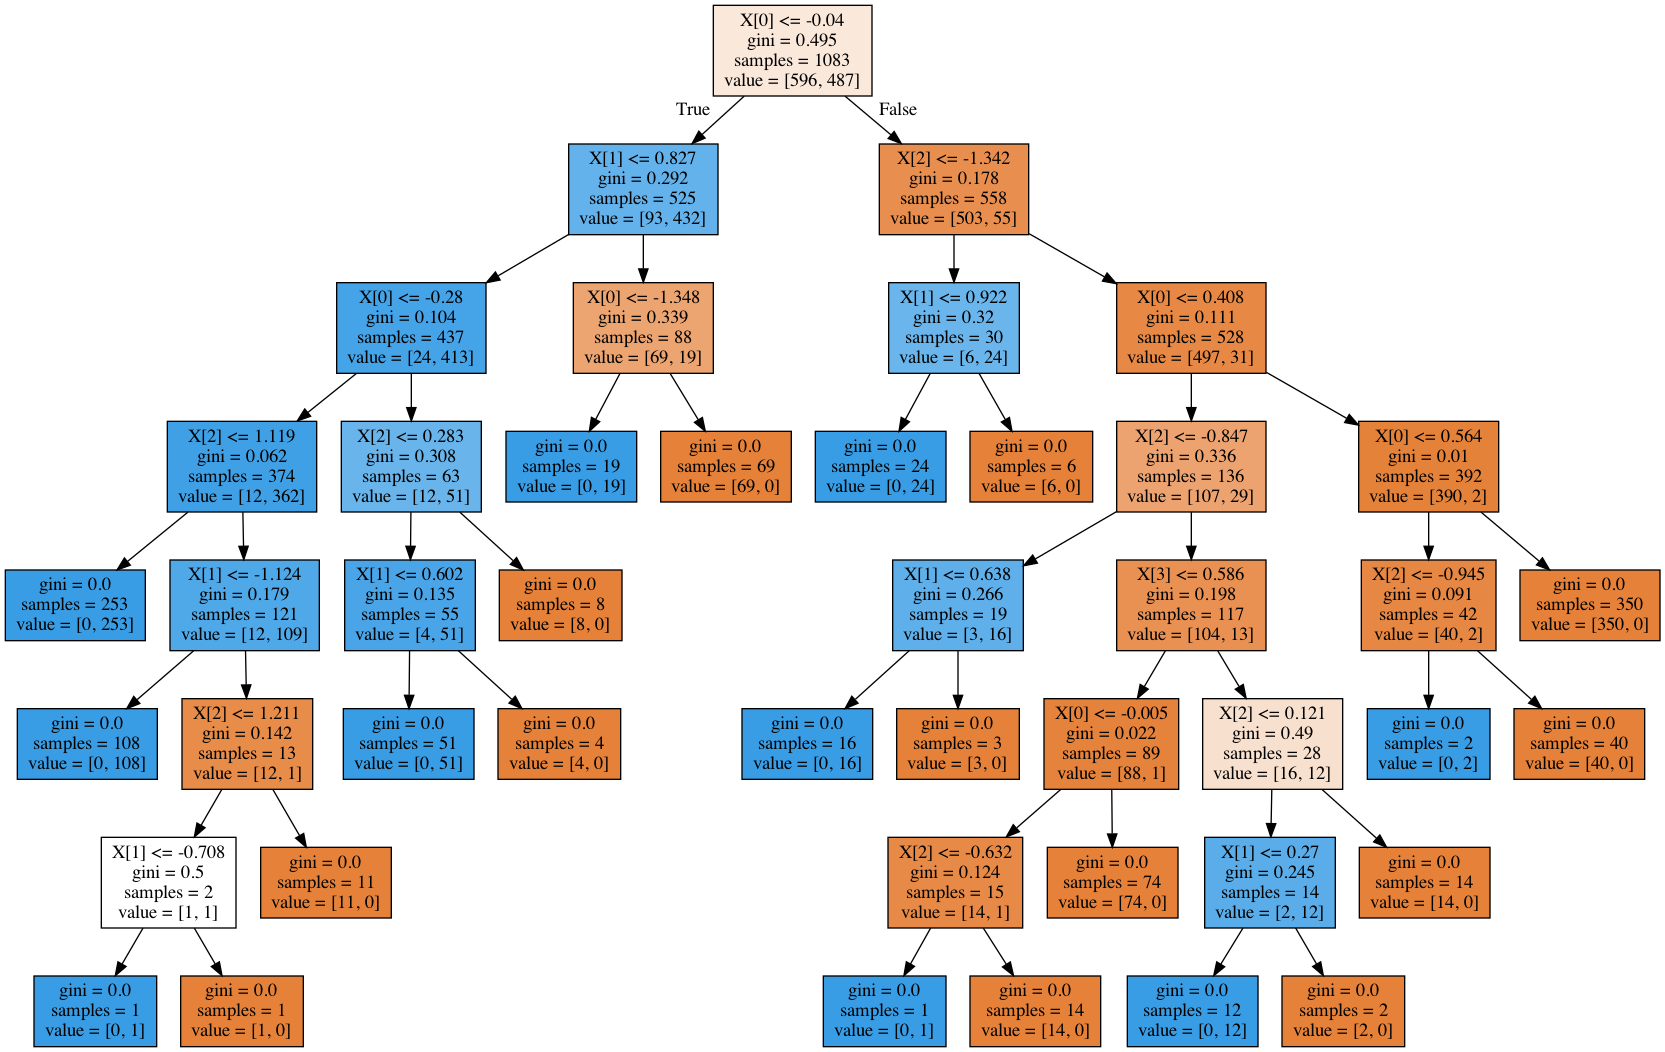

In [87]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(tree_clf, out_file = dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'bank_note_tree.png'
graph.write_png(filename)
Image(filename=filename) 

### Ensemble Methods

In this section, we evaluate four different ensemble machine learning algorithms:
 * **Boosting Methods**: AdaBoost (AB) and Gradient Boosting (GBM).
 * **Bagging Methods**: Random Forests (RF) and Extra Trees (ET).

A more detailed list can be found at [scikit-learn.org](https://scikit-learn.org/stable/modules/ensemble.html?highlight=adaboost).

In [88]:
# Import ensemble methods
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [89]:
# Set feature matrix and the target
X = data_c[:, :-1]
y = data_c[:, -1]

X = norm.fit_transform(X)

In [90]:
X.max(), X.min()

(0.9975783144233962, -0.9833347521754191)

In [91]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# Identify outliers in the training dataset
one_cls_out = OneClassSVM(nu=0.01)
yhat = one_cls_out.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(1097, 4) (1097,)
(1072, 4) (1072,)


In [92]:
# Initialize ensembles
ensembles = []

# Append the results obtained to ensembles 
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier())) 
results = []
names = []

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Create a for loop for getting accuracy results
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    acc_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(acc_results)

AB: 0.992541 (0.003730)
GBM: 0.994401 (0.004571)
RF: 0.995344 (0.006231)
ET: 0.997214 (0.005938)


In [93]:
from matplotlib import pyplot

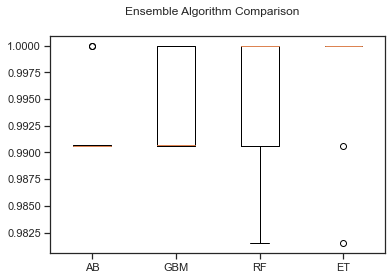

In [94]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

The results suggest ET may be worthy of further study.